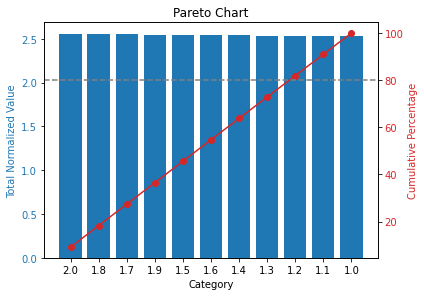

   Category  Edit Distance  STS(X , Xi)  STS(Xi , Xj)     Total  Cumulative  \
0       2.0       0.841180     0.848878      0.870639  2.560697    2.560697   
1       1.8       0.830911     0.849522      0.873131  2.553564    5.114261   
2       1.7       0.825043     0.850605      0.876053  2.551701    7.665962   
3       1.9       0.830054     0.848473      0.871878  2.550404   10.216366   
4       1.5       0.812227     0.853543      0.882676  2.548447   12.764813   
5       1.6       0.817746     0.851533      0.878441  2.547720   15.312534   
6       1.4       0.799263     0.854955      0.886718  2.540936   17.853470   
7       1.3       0.790295     0.856464      0.891363  2.538122   20.391592   
8       1.2       0.783949     0.858091      0.895876  2.537916   22.929507   
9       1.1       0.773555     0.858929      0.900643  2.533126   25.462633   
10      1.0       0.762402     0.860290      0.905818  2.528509   27.991142   

    Cumulative Percentage  Rank  
0                

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Provided data
categories = ['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9' , '2.0']
edit_distance = {
    "1.0": 3.049607158446089, "1.1": 3.0942189242931253, "1.2": 3.1357970803627686, 
    "1.3": 3.1611802221252305, "1.4": 3.197051263397842, "1.5": 3.2489099859353088, 
    "1.6": 3.2709842863378458, "1.7": 3.3001709588243866, "1.8": 3.3236444541442425, 
    "1.9": 3.320215577865077, "2.0": 3.3647218584800402
}
sts_x_xi = {
    "1.0": 0.8602895664379651, "1.1": 0.8589286463888457, "1.2": 0.8580906710344032, 
    "1.3": 0.8564639571240776, "1.4": 0.854955179787329, "1.5": 0.8535434654885156, 
    "1.6": 0.8515332886017176, "1.7": 0.8506048050025267, "1.8": 0.8495223051299486, 
    "1.9": 0.8484726625485316, "2.0": 0.8488776188925526
}
sts_xi_xj = {
    "1.0": 0.9058175787889242, "1.1": 0.9006428153518374, "1.2": 0.8958757134586521, 
    "1.3": 0.8913626153146744, "1.4": 0.8867183619028399, "1.5": 0.88267616278485, 
    "1.6": 0.8784407666789913, "1.7": 0.8760530956437955, "1.8": 0.8731307111608255, 
    "1.9": 0.8718776757104619, "2.0": 0.8706392282550696
}

# Data preparation
df = pd.DataFrame({
    'Category': categories,
    'Edit Distance': [edit_distance.get(cat, np.nan) for cat in categories],
    'STS(X , Xi)': [sts_x_xi.get(cat, np.nan) for cat in categories],
    'STS(Xi , Xj)': [sts_xi_xj.get(cat, np.nan) for cat in categories]
})

# Normalizing Edit Distance by dividing by 4
df['Edit Distance'] = df['Edit Distance'] / 4


# Normalizing columns to a range between 0 and 1
# df['Edit Distance'] = (df['Edit Distance'] - df['Edit Distance'].min()) / (df['Edit Distance'].max() - df['Edit Distance'].min())
# df['STS(X , Xi)'] = (df['STS(X , Xi)'] - df['STS(X , Xi)'].min()) / (df['STS(X , Xi)'].max() - df['STS(X , Xi)'].min())
# df['STS(Xi , Xj)'] = (df['STS(Xi , Xj)'] - df['STS(Xi , Xj)'].min()) / (df['STS(Xi , Xj)'].max() - df['STS(Xi , Xj)'].min())

# Calculate total normalized value and cumulative percentage
df['Total'] = df['Edit Distance'] + df['STS(X , Xi)'] + df['STS(Xi , Xj)']
df = df.sort_values(by='Total', ascending=False).reset_index(drop=True)
df['Cumulative'] = df['Total'].cumsum()
df['Cumulative Percentage'] = 100 * df['Cumulative'] / df['Total'].sum()

# Plot Pareto chart
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Normalized Value', color=color)
ax1.bar(df['Category'], df['Total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Percentage', color=color)
ax2.plot(df['Category'], df['Cumulative Percentage'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(80, color='grey', linestyle='--')

fig.tight_layout()
plt.title('Pareto Chart')
plt.show()

# Rank the rows based on the total normalized value
df['Rank'] = df['Total'].rank(ascending=False)
df = df.sort_values(by='Rank')

print(df)


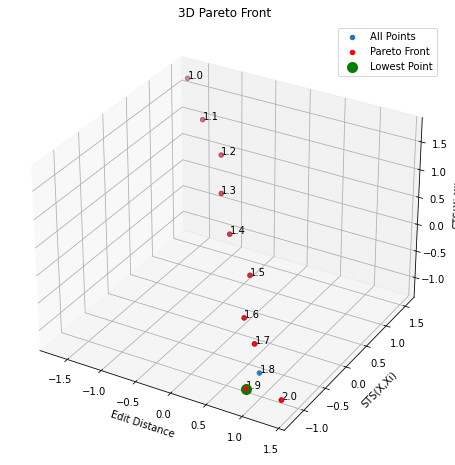

Pareto Front:
   Category  Edit Distance  STS(X,Xi)  STS(Xi,Xj)  SumObjectives
0       1.0      -1.685545   1.534084    1.720160       1.568699
1       1.1      -1.254924   1.214690    1.295839       1.255605
2       1.2      -0.853586   1.018026    0.904946       1.069386
3       1.3      -0.608572   0.636252    0.534881       0.562562
4       1.4      -0.262322   0.282157    0.154061       0.173897
5       1.5       0.238252  -0.049158   -0.177391       0.011703
6       1.6       0.451327  -0.520926   -0.524685      -0.594285
7       1.7       0.733055  -0.738832   -0.720470      -0.726247
9       1.9       0.926538  -1.239224   -1.062846      -1.375532
10      2.0       1.356141  -1.144185   -1.164396      -0.952440

Lowest Point on the Pareto Front:
Category              1.9
Edit Distance    0.926538
STS(X,Xi)       -1.239224
STS(Xi,Xj)      -1.062846
SumObjectives   -1.375532
Name: 9, dtype: object


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
np.random.seed(0)
data = {
    'Category': ['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9' , '2.0'],
    'Edit Distance': [edit_distance.get(cat, np.nan) for cat in categories],
    'STS(X,Xi)': [sts_x_xi.get(cat, np.nan) for cat in categories],
    'STS(Xi,Xj)': [sts_xi_xj.get(cat, np.nan) for cat in categories]
}

df = pd.DataFrame(data)

df['Edit Distance'] = (df['Edit Distance'] - df['Edit Distance'].mean()) / df['Edit Distance'].std()
df['STS(X,Xi)'] = (df['STS(X,Xi)'] - df['STS(X,Xi)'].mean()) / df['STS(X,Xi)'].std()
df['STS(Xi,Xj)'] = (df['STS(Xi,Xj)'] - df['STS(Xi,Xj)'].mean()) / df['STS(Xi,Xj)'].std()

# Identify Pareto front
def is_pareto_efficient(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A boolean array of pareto-efficient points
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0
    while next_point_index < len(costs):
        nondominated_point_mask = np.any(costs < costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask] 
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index + 1])
    return is_efficient

costs = df[['Edit Distance', 'STS(X,Xi)', 'STS(Xi,Xj)']].values
pareto_indices = is_pareto_efficient(costs)
pareto_front = df.loc[pareto_indices]

# Identify the lowest point on the Pareto front (based on the sum of objectives)
pareto_front['SumObjectives'] = pareto_front[['Edit Distance', 'STS(X,Xi)', 'STS(Xi,Xj)']].sum(axis=1)
lowest_point = pareto_front.loc[pareto_front['SumObjectives'].idxmin()]

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Edit Distance'], df['STS(X,Xi)'], df['STS(Xi,Xj)'], label='All Points')
ax.scatter(pareto_front['Edit Distance'], pareto_front['STS(X,Xi)'], pareto_front['STS(Xi,Xj)'], color='red', label='Pareto Front')
ax.scatter(lowest_point['Edit Distance'], lowest_point['STS(X,Xi)'], lowest_point['STS(Xi,Xj)'], color='green', s=100, label='Lowest Point')

for i, row in df.iterrows():
    ax.text(row['Edit Distance'], row['STS(X,Xi)'], row['STS(Xi,Xj)'], f"{row['Category']}", size=10, zorder=1, color='k')


ax.set_xlabel('Edit Distance')
ax.set_ylabel('STS(X,Xi)')
ax.set_zlabel('STS(Xi,Xj)')
ax.set_title('3D Pareto Front')
ax.legend()
plt.show()

# Print the Pareto front and the lowest point
print("Pareto Front:")
print(pareto_front)
print("\nLowest Point on the Pareto Front:")
print(lowest_point)


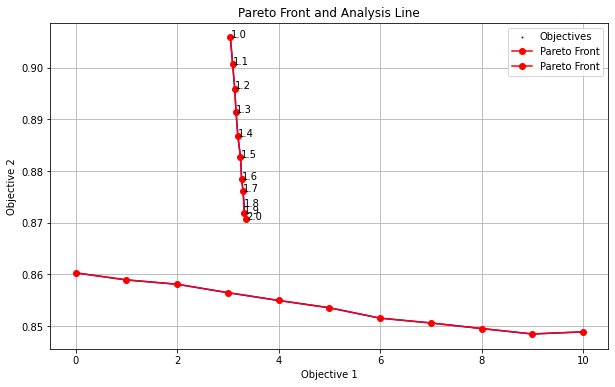

In [5]:
import numpy as np
import matplotlib.pyplot as plt


edit_distance = {"1.0": 3.049607158446089, "1.1": 3.0942189242931253, "1.2": 3.1357970803627686, "1.3": 3.1611802221252305, "1.4": 3.197051263397842, "1.5": 3.2489099859353088, "1.6": 3.2709842863378458, "1.7": 3.3001709588243866, "1.8": 3.3236444541442425, "1.9": 3.320215577865077, "2.0": 3.3647218584800402}

sts_xi_xj = {
    "1.0": 0.9058175787889242, "1.1": 0.9006428153518374, "1.2": 0.8958757134586521, 
    "1.3": 0.8913626153146744, "1.4": 0.8867183619028399, "1.5": 0.88267616278485, 
    "1.6": 0.8784407666789913, "1.7": 0.8760530956437955, "1.8": 0.8731307111608255, 
    "1.9": 0.8718776757104619, "2.0": 0.8706392282550696
}

sts_x_xi = {"1.0": 0.8602895664379651, "1.1": 0.8589286463888457, "1.2": 0.8580906710344032, "1.3": 0.8564639571240776, "1.4": 0.854955179787329, "1.5": 0.8535434654885156, "1.6": 0.8515332886017176, "1.7": 0.8506048050025267, "1.8": 0.8495223051299486, "1.9": 0.8484726625485316, "2.0": 0.8488776188925526}


# Convert the data to numpy arrays for easier manipulation
x_values = np.array(list(sts_x_xi.keys()), dtype=float)
objective3 = np.array(list(sts_x_xi.values()))
objective2 = np.array(list(sts_xi_xj.values()))
objective1 = np.array(list(edit_distance.values()))

# Combine the objectives into a single array
objectives = np.vstack((objective1, objective2 , objective3)).T

# Function to identify the Pareto front
def pareto_front(points):
    sorted_points = points[np.argsort(points[:, 0])]
    pareto_front = [sorted_points[0]]
    for point in sorted_points[1:]:
        if point[1] < pareto_front[-1][1]:
            pareto_front.append(point)
    return np.array(pareto_front)

# Identify the Pareto front
pareto_points = pareto_front(objectives)

# Plotting
plt.figure(figsize=(10, 6))

# Plot all points
for i, txt in enumerate(x_values):
    plt.annotate(txt, (objective1[i], objective2[i]))
    
# x_line = np.linspace(0, 1, 100)
# y_line = np.linspace(0, 1, 100)
# plt.plot(x_line, y_line, label='Analysis Line', linestyle='--', color='green')
    
plt.scatter(objectives[:, 0], objectives[:, 1], objectives[: , 2], label='Objectives', color='blue')
plt.plot(objectives[:, 0], objectives[:, 1],objectives[: , 2], color='blue')

# Plot Pareto front
plt.plot(pareto_points[:, 0], pareto_points[:, 1],objectives[: , 2], label='Pareto Front', color='red', marker='o')

# Analysis line: Example line, you can customize as needed

# Labels and title
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front and Analysis Line')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


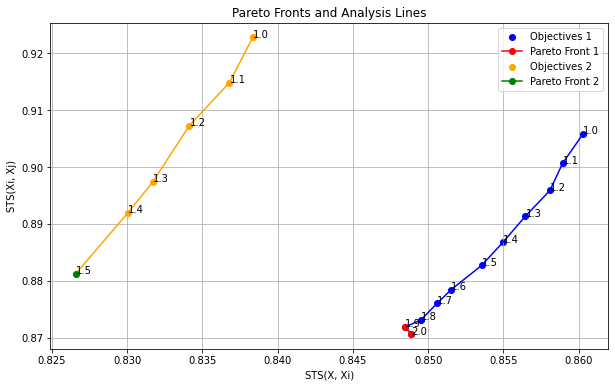

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
sts_x_xi = {"1.0": 0.8602895664379651, "1.1": 0.8589286463888457, "1.2": 0.8580906710344032, "1.3": 0.8564639571240776, "1.4": 0.854955179787329, "1.5": 0.8535434654885156, "1.6": 0.8515332886017176, "1.7": 0.8506048050025267, "1.8": 0.8495223051299486, "1.9": 0.8484726625485316, "2.0": 0.8488776188925526}

sts_xi_xj = {
    "1.0": 0.9058175787889242,
    "1.1": 0.9006428153518374,
    "1.2": 0.8958757134586521,
    "1.3": 0.8913626153146744,
    "1.4": 0.8867183619028399,
    "1.5": 0.88267616278485,
    "1.6": 0.8784407666789913, 
    "1.7": 0.8760530956437955, 
    "1.8": 0.8731307111608255, 
    "1.9": 0.8718776757104619, 
    "2.0": 0.8706392282550696
}

# Convert the data to numpy arrays for easier manipulation
x_values_1 = np.array(list(sts_x_xi.keys()), dtype=float)
objective1_1 = np.array(list(sts_x_xi.values()))
objective2_1 = np.array(list(sts_xi_xj.values()))

# Combine the objectives into a single array
objectives_1 = np.vstack((objective1_1, objective2_1)).T

# Function to identify the Pareto front
def pareto_front(points):
    sorted_points = points[np.argsort(points[:, 0])]
    pareto_front = [sorted_points[0]]
    for point in sorted_points[1:]:
        if point[1] < pareto_front[-1][1]:
            pareto_front.append(point)
    return np.array(pareto_front)

# Identify the Pareto front for the original data
pareto_points_1 = pareto_front(objectives_1)

# New data
sts_x_xi_new = {"1.0": 0.8383409723206359, "1.1": 0.8367970913646576, "1.2": 0.8341396457579915, "1.3": 0.8317051408658255, "1.4": 0.8300633729878393, "1.5": 0.8265932676039522}
sts_xi_xj_new = {
    "1.0": 0.9227587115248764,
    "1.1": 0.9148140618746233,
    "1.2": 0.9072840878638111,
    "1.3": 0.8973675114875063,
    "1.4": 0.8919609500819866,
    "1.5": 0.8812302469040467
}

# Convert the new data to numpy arrays for easier manipulation
x_values_2 = np.array(list(sts_x_xi_new.keys()), dtype=float)
objective1_2 = np.array(list(sts_x_xi_new.values()))
objective2_2 = np.array(list(sts_xi_xj_new.values()))

# Combine the objectives into a single array
objectives_2 = np.vstack((objective1_2, objective2_2)).T

# Identify the Pareto front for the new data
pareto_points_2 = pareto_front(objectives_2)

# Plotting
plt.figure(figsize=(10, 6))

# Plot all points for the original data
plt.scatter(objectives_1[:, 0], objectives_1[:, 1], label='Objectives 1', color='blue')
plt.plot(objectives_1[:, 0], objectives_1[:, 1], color='blue')

# Annotate points for the original data
for i, txt in enumerate(x_values_1):
    plt.annotate(txt, (objective1_1[i], objective2_1[i]))

# Plot Pareto front for the original data
plt.plot(pareto_points_1[:, 0], pareto_points_1[:, 1], label='Pareto Front 1', color='red', marker='o')

# Plot all points for the new data
plt.scatter(objectives_2[:, 0], objectives_2[:, 1], label='Objectives 2', color='orange')
plt.plot(objectives_2[:, 0], objectives_2[:, 1], color='orange')

# Annotate points for the new data
for i, txt in enumerate(x_values_2):
    plt.annotate(txt, (objective1_2[i], objective2_2[i]))

# Plot Pareto front for the new data
plt.plot(pareto_points_2[:, 0], pareto_points_2[:, 1], label='Pareto Front 2', color='green', marker='o')

# Analysis lines: Example lines, you can customize as needed
# x_line_1 = np.linspace(min(objectives_1[:, 0]), max(objectives_1[:, 0]), 100)
# y_line_1 = np.interp(x_line_1, objectives_1[:, 0], objectives_1[:, 1])
# plt.plot(x_line_1, y_line_1, label='Analysis Line 1', linestyle='--', color='green')

# x_line_2 = np.linspace(min(objectives_2[:, 0]), max(objectives_2[:, 0]), 100)
# y_line_2 = np.interp(x_line_2, objectives_2[:, 0], objectives_2[:, 1])
# plt.plot(x_line_2, y_line_2, label='Analysis Line 2', linestyle='--', color='purple')

# Labels and title
plt.xlabel('STS(X, Xi)')
plt.ylabel('STS(Xi, Xj)')
plt.title('Pareto Fronts and Analysis Lines')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


[[3.04960716 0.90581758 0.86028957]
 [3.09421892 0.90064282 0.85892865]
 [3.13579708 0.89587571 0.85809067]
 [3.16118022 0.89136262 0.85646396]
 [3.19705126 0.88671836 0.85495518]
 [3.24890999 0.88267616 0.85354347]
 [3.27098429 0.87844077 0.85153329]
 [3.30017096 0.8760531  0.85060481]
 [3.32021558 0.87187768 0.84847266]]


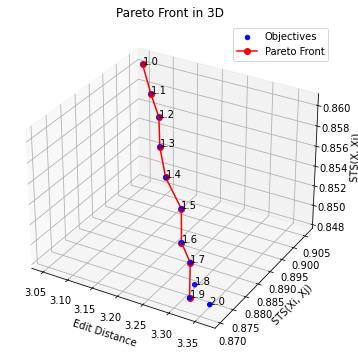

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
edit_distance = {
    "1.0": 3.049607158446089, "1.1": 3.0942189242931253, "1.2": 3.1357970803627686,
    "1.3": 3.1611802221252305, "1.4": 3.197051263397842, "1.5": 3.2489099859353088,
    "1.6": 3.2709842863378458, "1.7": 3.3001709588243866, "1.8": 3.3236444541442425,
    "1.9": 3.320215577865077, "2.0": 3.3647218584800402
}

sts_xi_xj = {
    "1.0": 0.9058175787889242, "1.1": 0.9006428153518374, "1.2": 0.8958757134586521,
    "1.3": 0.8913626153146744, "1.4": 0.8867183619028399, "1.5": 0.88267616278485,
    "1.6": 0.8784407666789913, "1.7": 0.8760530956437955, "1.8": 0.8731307111608255,
    "1.9": 0.8718776757104619, "2.0": 0.8706392282550696
}

sts_x_xi = {
    "1.0": 0.8602895664379651, "1.1": 0.8589286463888457, "1.2": 0.8580906710344032,
    "1.3": 0.8564639571240776, "1.4": 0.854955179787329, "1.5": 0.8535434654885156,
    "1.6": 0.8515332886017176, "1.7": 0.8506048050025267, "1.8": 0.8495223051299486,
    "1.9": 0.8484726625485316, "2.0": 0.8488776188925526
}

# Convert the data to numpy arrays for easier manipulation
x_values = np.array(list(sts_x_xi.keys()), dtype=float)
objective1 = np.array(list(edit_distance.values()))
objective2 = np.array(list(sts_xi_xj.values()))
objective3 = np.array(list(sts_x_xi.values()))

# Combine the objectives into a single array
objectives = np.vstack((objective1, objective2, objective3)).T

# Function to identify the Pareto front
def pareto_front(points):
    sorted_points = points[np.argsort(points[:, 0])]
    pareto_front = [sorted_points[0]]
    for point in sorted_points[1:]:
        if point[1] < pareto_front[-1][1] and point[2] < pareto_front[-1][2]:
            pareto_front.append(point)
    return np.array(pareto_front)

# Identify the Pareto front
pareto_points = pareto_front(objectives)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot all points
for i, txt in enumerate(x_values):
    ax.text(objective1[i], objective2[i], objective3[i], txt)

# Scatter plot for all points
ax.scatter(objective1, objective2, objective3, label='Objectives', color='blue')

print(pareto_points)
# Plot Pareto front
ax.plot(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], label='Pareto Front', color='red', marker='o')

# Labels and title
ax.set_xlabel('Edit Distance')
ax.set_ylabel('STS(Xi, Xj)')
ax.set_zlabel('STS(X, Xi)')
ax.set_title('Pareto Front in 3D')

# Show plot
plt.legend()
plt.show()


[[ 9.67776863 25.74929083 72.80160476]
 [ 9.81934173 25.60219003 72.68643753]
 [ 9.95128783 25.46667765 72.61552426]
 [10.0318399  25.33838573 72.47786435]
 [10.14567478 25.20636552 72.35018477]
 [10.31024572 25.09145964 72.2307191 ]
 [10.38029735 24.97106184 72.06060882]
 [10.47291973 24.90318853 71.98203632]
 [10.53653028 24.78449565 71.80160476]]


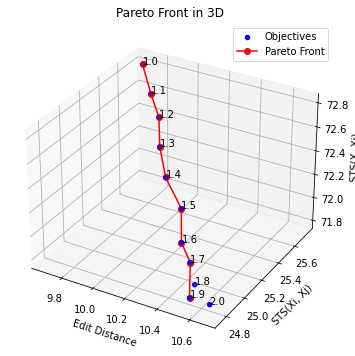

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
edit_distance = {
    "1.0": 3.049607158446089, "1.1": 3.0942189242931253, "1.2": 3.1357970803627686,
    "1.3": 3.1611802221252305, "1.4": 3.197051263397842, "1.5": 3.2489099859353088,
    "1.6": 3.2709842863378458, "1.7": 3.3001709588243866, "1.8": 3.3236444541442425,
    "1.9": 3.320215577865077, "2.0": 3.3647218584800402
}

sts_xi_xj = {
    "1.0": 0.9058175787889242, "1.1": 0.9006428153518374, "1.2": 0.8958757134586521,
    "1.3": 0.8913626153146744, "1.4": 0.8867183619028399, "1.5": 0.88267616278485,
    "1.6": 0.8784407666789913, "1.7": 0.8760530956437955, "1.8": 0.8731307111608255,
    "1.9": 0.8718776757104619, "2.0": 0.8706392282550696
}

sts_x_xi = {
    "1.0": 0.8602895664379651, "1.1": 0.8589286463888457, "1.2": 0.8580906710344032,
    "1.3": 0.8564639571240776, "1.4": 0.854955179787329, "1.5": 0.8535434654885156,
    "1.6": 0.8515332886017176, "1.7": 0.8506048050025267, "1.8": 0.8495223051299486,
    "1.9": 0.8484726625485316, "2.0": 0.8488776188925526
}

# df['Edit Distance'] = (df['Edit Distance'] - df['Edit Distance'].min()) / (df['Edit Distance'].max() - df['Edit Distance'].min())
# df['STS(X , Xi)'] = (df['STS(X , Xi)'] - df['STS(X , Xi)'].min()) / (df['STS(X , Xi)'].max() - df['STS(X , Xi)'].min())
# df['STS(Xi , Xj)'] = (df['STS(Xi , Xj)'] - df['STS(Xi , Xj)'].min()) / (df['STS(Xi , Xj)'].max() - df['STS(Xi , Xj)'].min())


# Convert the data to numpy arrays for easier manipulation
x_values = np.array(list(sts_x_xi.keys()), dtype=float)
objective1 = np.array(list(edit_distance.values()))
objective1 = (objective1 ) / (objective1.max() - objective1.min())
objective2 = np.array(list(sts_xi_xj.values()))
objective2 = (objective2 ) / (objective2.max() - objective2.min())
objective3 = np.array(list(sts_x_xi.values()))
objective3 = (objective3 ) / (objective3.max() - objective3.min())

# Combine the objectives into a single array
objectives = np.vstack((objective1, objective2, objective3)).T

# Function to identify the Pareto front
def pareto_front(points):
    sorted_points = points[np.argsort(points[:, 0])]
    pareto_front = [sorted_points[0]]
    for point in sorted_points[1:]:
        if point[1] < pareto_front[-1][1] and point[2] < pareto_front[-1][2]:
            pareto_front.append(point)
    return np.array(pareto_front)

# Identify the Pareto front
pareto_points = pareto_front(objectives)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot all points
for i, txt in enumerate(x_values):
    ax.text(objective1[i], objective2[i], objective3[i], txt)

# Scatter plot for all points
ax.scatter(objective1, objective2, objective3, label='Objectives', color='blue')

print(pareto_points)
# Plot Pareto front
ax.plot(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], label='Pareto Front', color='red', marker='o')

# Labels and title
ax.set_xlabel('Edit Distance')
ax.set_ylabel('STS(Xi, Xj)')
ax.set_zlabel('STS(X, Xi)')
ax.set_title('Pareto Front in 3D')

# Show plot
plt.legend()
plt.show()
